<a href="https://colab.research.google.com/github/Henrxque/Analise_exploratoria_IMDB/blob/main/Analise_Exploratoria_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color= Aqua		size = 5 font face = "Helvetica "> Análise exploratória: Bilheteria e Top 1000 filmes pelo IMDB



<br>

##O que é Análise exploratória?

Análise exploratória de dados, é utilizada por Cientistas de Dados para investigar e analisar um conjunto de dados abstratos e então tirar conclusões que podem ajudar na tomada de decisão ou na obtenção de uma informação importante. Na Análise exploratória, o Cientista de Dados consegue identificar Padrões, anomalias e verificar suposições, utilizando técnicas de controle e manipulação de Dados.

<br>


---

<br>


##Sobre o Projeto

Imagine que trabalhamos em um projeto para uma grande produtora de Filmes que deseja lançar tanto um filme bem recebido pela crítica, um filme bem recebido pelo público e um filme sucesso de bilheteria. 

Mas para isso precisamos definir um critério para auxiliar na tomada de decisão: 

* Análise sobre a Bilheteria, para definir um filme de sucesso. 
* Análise sobre a nota do público no IMDB. 
* Análise sobre a nota da crítica (METASCORE) pelo IMDB. 



</font>






###Bibliotecas Utilizadas

* Pandas
* Numpy 
* Seaborn
* Matplotlib


<br>
<br>

###Datasets:


* [IMDB top 1000](https://www.kaggle.com/datasets/ramjasmaurya/top-250s-in-imdb?select=imdb+%281000+movies%29+in+june+2022.csv)


* [Top Box Office Revenue Data](https://www.kaggle.com/datasets/kalilurrahman/top-box-office-revenue-data-english-movies?select=boxofficemojotopgenres.tsv)


</font>

##Perguntas a serem respondidas:


Início:

* Top 10 filmes em Bilheteria
* Top 10 filmes em avaliação no IMDB
* Top 10 filmes em avaliação com o Metascore 

Bilheteria: 

* O Gênero de um filme impacta na bilheteria?
* Quais os gêneros que possui maior valor em bilheteria?
* Quais os gêneros mais rentáveis?

Avaliação no IMDB:
* Qual o gênero com melhores avaliações no IMDB pelo público e pela crítica (METASCORE)?
* Qual a média de avaliação por gênero?
* Entre os atores principais, quais estão presente nos melhores filmes?
* Qual é realmente os melhores filmes do IMDB, juntando a nota do público com a nota da crítica?




## Importando Bibliotecas

In [252]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from google.colab import drive
import zipfile

In [253]:
drive.mount('/content/drive') #acessando o Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importação dos Arquivos

In [254]:
boxoffice = pd.read_csv('/content/drive/MyDrive/Dataset/Movies/boxofficemojotop1000.tsv', sep='\t', header=0)
genres = pd.read_csv('/content/drive/MyDrive/Dataset/Movies/boxofficemojotopgenres.tsv', sep='\t', header=0)
movies = pd.read_csv('/content/drive/MyDrive/Dataset/Movies/top1000imdb.csv')

## Conhecendo o Dataset

In [255]:
boxoffice.head(3)

,Rank,Title,Worldwide Lifetime Gross,Domestic Lifetime Gross,Domestic %,Foreign Lifetime Gross,Foreign %,Year
0,1,Avatar,2847246203,760507625,0.27,2086738578,0.73,2009
1,2,Avengers: Endgame,2797501328,858373000,0.31,1939128328,0.69,2019
2,3,Titanic,2201647264,659363944,0.30,1542283320,0.70,1997


In [256]:
genres.head(3)

,Genre,Total,Titles,#1 Title,Lifetime Gross
0,Heroine,8513688318,82,Star Wars: Episode VII - The Force Awakens,936662225
1,Adventure,68146286235,877,Star Wars: Episode VII - The Force Awakens,936662225
2,Supernatural,60041261115,750,Star Wars: Episode VII - The Force Awakens,936662225


In [257]:
movies.head(3)

,ranking of movie\r\n,movie name\r\n,Year,certificate,runtime,genre,RATING,metascore,DETAIL ABOUT MOVIE\n,DIRECTOR\r\n,ACTOR 1\n,ACTOR 2\n,ACTOR 3,ACTOR 4,votes,GROSS COLLECTION\r\n
0,1,The Shawshank Redemption,-1994,15,142 min,Drama,9.3,81.0,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,"2,603,314",$28.34M
1,2,The Godfather,-1972,X,175 min,"Crime, Drama",9.2,100.0,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,"1,798,731",$134.97M
2,3,The Dark Knight,-2008,12A,152 min,"Action, Crime, Drama",9.0,84.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,"2,574,810",$534.86M


In [258]:
print('O Dataset de Bilheteria possui possui %s linhas e %s colunas' % (boxoffice.shape[0], boxoffice.shape[1]))
print('O Dataset de Gêneros (Box Office) possui possui %s linhas e %s colunas' % (genres.shape[0], genres.shape[1]))
print('O Dataset de Filmes no IMDB possui possui %s linhas e %s colunas' % (movies.shape[0], movies.shape[1]))


O Dataset de Bilheteria possui possui 1000 linhas e 8 colunas
O Dataset de Gêneros (Box Office) possui possui 245 linhas e 5 colunas
O Dataset de Filmes no IMDB possui possui 1000 linhas e 16 colunas


## Data Cleaning


Vamos limpar alguns dados dos nossos Datasets, que não serão necessários durante o projeto. Dentro do Dataset de gêneros vamos remover a coluna #1 Title e Lifetime Gross pois são informações que já temos no Dataset de Bilheteria. 

No Dataset de Filmes vamos remover DETAIL ABOUT MOVIE\n	e certificate que basicamente é a Sinopse do filme e a classificação indicativa, pois acredito que pode não ter sentido dentro do nosso projeto. 


<br>



In [259]:
genres.head()

,Genre,Total,Titles,#1 Title,Lifetime Gross
0,Heroine,8513688318,82,Star Wars: Episode VII - The Force Awakens,936662225
1,Adventure,68146286235,877,Star Wars: Episode VII - The Force Awakens,936662225
2,Supernatural,60041261115,750,Star Wars: Episode VII - The Force Awakens,936662225
3,IMAX,56249895595,372,Star Wars: Episode VII - The Force Awakens,936662225
4,3D,50745498053,394,Star Wars: Episode VII - The Force Awakens,936662225


In [260]:
genres.drop(['#1 Title','Lifetime Gross'], axis = 1, inplace = True)

In [261]:
genres.head()

,Genre,Total,Titles
0,Heroine,8513688318,82
1,Adventure,68146286235,877
2,Supernatural,60041261115,750
3,IMAX,56249895595,372
4,3D,50745498053,394


Encontrei no Dataset os "Gêneros IMAX e 3D" no top 4 de Gêneros, isso pode impactar negativamente nossas análises pois, IMAX e 3D não são gêneros de filme, e sim um formato de assistir o filme no Cinema. Portanto vou excluí-los do Dataset

In [262]:
genres.drop([3,4], inplace= True)
genres.head()

,Genre,Total,Titles
0,Heroine,8513688318,82
1,Adventure,68146286235,877
2,Supernatural,60041261115,750
5,Comic Book Adaptation,25665243979,181
6,Invasion,7243530273,58


In [263]:
movies.head()

,ranking of movie\r\n,movie name\r\n,Year,certificate,runtime,genre,RATING,metascore,DETAIL ABOUT MOVIE\n,DIRECTOR\r\n,ACTOR 1\n,ACTOR 2\n,ACTOR 3,ACTOR 4,votes,GROSS COLLECTION\r\n
0,1,The Shawshank Redemption,-1994,15,142 min,Drama,9.3,81.0,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,"2,603,314",$28.34M
1,2,The Godfather,-1972,X,175 min,"Crime, Drama",9.2,100.0,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,"1,798,731",$134.97M
2,3,The Dark Knight,-2008,12A,152 min,"Action, Crime, Drama",9.0,84.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,"2,574,810",$534.86M
3,4,The Lord of the Rings: The Return of the King,-2003,12A,201 min,"Action, Adventure, Drama",9.0,94.0,Gandalf and Aragorn lead the World of Men agai...,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,"1,787,701",$377.85M
4,5,Schindler's List,-1993,15,195 min,"Biography, Drama, History",9.0,94.0,"In German-occupied Poland during World War II,...",Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,"1,323,776",$96.90M


Removi as colunas "DETAIL ABOUT MOVIE" e "Ceriticate" pois acredito não serem úteis para o projeto. 

In [264]:
movies.drop(['DETAIL ABOUT MOVIE\n','certificate'], axis = 1, inplace = True)
movies.head()

,ranking of movie\r\n,movie name\r\n,Year,runtime,genre,RATING,metascore,DIRECTOR\r\n,ACTOR 1\n,ACTOR 2\n,ACTOR 3,ACTOR 4,votes,GROSS COLLECTION\r\n
0,1,The Shawshank Redemption,-1994,142 min,Drama,9.3,81.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,"2,603,314",$28.34M
1,2,The Godfather,-1972,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,"1,798,731",$134.97M
2,3,The Dark Knight,-2008,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,"2,574,810",$534.86M
3,4,The Lord of the Rings: The Return of the King,-2003,201 min,"Action, Adventure, Drama",9.0,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,"1,787,701",$377.85M
4,5,Schindler's List,-1993,195 min,"Biography, Drama, History",9.0,94.0,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,"1,323,776",$96.90M


## Renomeando as colunas. 

Para facilitar o entendimento aos leitores, irei alterar os nomes das colunas. 

In [265]:
boxoffice.columns = ['Rank', 'Filme', 'Bilheteria_Mundial', 'Bilheteria_Domestic','%Domestic','Bilheteria_Ext','%Ext','Ano']
boxoffice.head(2)

,Rank,Filme,Bilheteria_Mundial,Bilheteria_Domestic,%Domestic,Bilheteria_Ext,%Ext,Ano
0,1,Avatar,2847246203,760507625,0.27,2086738578,0.73,2009
1,2,Avengers: Endgame,2797501328,858373000,0.31,1939128328,0.69,2019


In [266]:
movies.columns = ['Rank', 'Filme', 'Ano', 'Tempo','Genero','Nota','Metascore','Diretor','Ator1','Ator2','Ator3','Ator4','Votos','Bilheteria_Domestic']
movies.head(2)


,Rank,Filme,Ano,Tempo,Genero,Nota,Metascore,Diretor,Ator1,Ator2,Ator3,Ator4,Votos,Bilheteria_Domestic
0,1,The Shawshank Redemption,-1994,142 min,Drama,9.3,81.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,"2,603,314",$28.34M
1,2,The Godfather,-1972,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,"1,798,731",$134.97M


In [267]:
genres.columns = ['Genero','Bilheteria_Genero','Qtd_Filmes']
genres.head(2)

,Genero,Bilheteria_Genero,Qtd_Filmes
0,Heroine,8513688318,82
1,Adventure,68146286235,877


## Dicionário de Dados


Boxoffice (Bilheteria)
* Rank: Indica o ranking dos filmes com maiores bilheteria. 
* Filme: Nome do Filme.
* Bilheteria Mundial: Soma da Bilheteria de todo mundo.
* Bilheteria_domestic: Soma de Bilheteria Doméstica, ou seja, do país que o filme foi realizado. 
* %Domestic: Quantos % de Bilheteria Domestica equivale na soma Mundial. 
* Bilheteria_Ext: Soma de Bilheteria restante do mundo. 
* %Ext: Quantos % de Bilheteria Extrangeira equivale na soma Mundial. 
* Ano: Ano de lançamento do Filme. 


Movies (Filmes)
* Rank: Ranking do filme entre os 1000 melhores filmes do IMDB.
* Filme: Nome do Filme
* Tempo: Tempo do Filme. 
* Genero: Genero do filme. 
* Nota: Média de Notas do Público para o filme.
* Metascore: Média de nota da Crítica pelo Metascore.
* Diretor: Nome do Diretor. 
* Ator[N]: Artistas envolvidos no filme.


Genres (Gêneros)
* Genero: Genero do Filme. 
* Bilheteria_Genero: SOma de bilheteria para aquele Genero.
* Qtd_Filmes: Soma de filmes de determinado Genero.

Explorando o Dataset, identifiquei que alguns filmes não possuem nota no Metascore, isso devido a aparentemente esses filmes serem poucos conhecidos ao redor do mundo, e serem segmentados demais a apenas um País, portanto vamos remover do Dataset pois pode impactar em nosso resultado. 

In [268]:
movies.info() #Identificando 837 filmes apenas com avaliação no IMDB ao invés de 1000. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 1000 non-null   object 
 1   Filme                1000 non-null   object 
 2   Ano                  1000 non-null   object 
 3   Tempo                1000 non-null   object 
 4   Genero               1000 non-null   object 
 5   Nota                 1000 non-null   float64
 6   Metascore            837 non-null    float64
 7   Diretor              1000 non-null   object 
 8   Ator1                1000 non-null   object 
 9   Ator2                1000 non-null   object 
 10  Ator3                1000 non-null   object 
 11  Ator4                1000 non-null   object 
 12  Votos                1000 non-null   object 
 13  Bilheteria_Domestic  820 non-null    object 
dtypes: float64(2), object(12)
memory usage: 109.5+ KB


In [269]:
movies.query("Metascore != Metascore") #fiz uma query para identificar o que estava acontecendo, e identifiquei muitos filmes Segmentados, geralmente da Índia ou filmes poucos conhecidos, o que não faz sentido para nossa Case de "Filmes de Sucesso" ao redor do mundo. 

,Rank,Filme,Ano,Tempo,Genero,Nota,Metascore,Diretor,Ator1,Ator2,Ator3,Ator4,Votos,Bilheteria_Domestic
7,8,Jai Bhim,-2021,164 min,"Crime, Drama, Mystery",8.9,NaN,T.J. Gnanavel,Suriya,Lijo Mol Jose,Manikandan K.,Rajisha Vijayan,"191,329",NaN
15,16,Soorarai Pottru,-2020,153 min,Drama,8.7,NaN,Sudha Kongara,Suriya,Paresh Rawal,Aparna Balamurali,Urvashi,"111,090",NaN
34,35,Asuran,-2019,141 min,"Action, Drama",8.5,NaN,Vetrimaaran,Dhanush,Manju Warrier,Prakash Raj,Pasupathy,"26,935",NaN
38,39,K.G.F: Chapter 2,-2022,168 min,"Action, Crime, Drama",8.5,NaN,Prashanth Neel,Yash,Sanjay Dutt,Raveena Tandon,Srinidhi Shetty,"109,453",NaN
39,40,Sardar Udham,-2021,164 min,"Biography, Crime, Drama",8.5,NaN,Shoojit Sircar,Vicky Kaushal,Shaun Scott,Stephen Hogan,Amol Parashar,"39,965",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,891,Belle de Jour,-1967,100 min,"Drama, Romance",7.7,NaN,Luis Buñuel,Catherine Deneuve,Jean Sorel,Michel Piccoli,Geneviève Page,"44,120",$0.03M
898,899,Breathless,-1960,90 min,"Crime, Drama",7.7,NaN,Jean-Luc Godard,Jean-Paul Belmondo,Jean Seberg,Daniel Boulanger,Henri-Jacques Huet,"80,234",$0.34M
903,904,Key Largo,-1948,100 min,"Action, Crime, Drama",7.7,NaN,John Huston,Humphrey Bogart,Edward G. Robinson,Lauren Bacall,Lionel Barrymore,"40,559",NaN
930,931,Cell 211,-2009,113 min,"Action, Crime, Drama",7.6,NaN,Daniel Monzón,Luis Tosar,Alberto Ammann,Antonio Resines,Manuel Morón,"67,334",NaN


In [270]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 1000 non-null   object 
 1   Filme                1000 non-null   object 
 2   Ano                  1000 non-null   object 
 3   Tempo                1000 non-null   object 
 4   Genero               1000 non-null   object 
 5   Nota                 1000 non-null   float64
 6   Metascore            837 non-null    float64
 7   Diretor              1000 non-null   object 
 8   Ator1                1000 non-null   object 
 9   Ator2                1000 non-null   object 
 10  Ator3                1000 non-null   object 
 11  Ator4                1000 non-null   object 
 12  Votos                1000 non-null   object 
 13  Bilheteria_Domestic  820 non-null    object 
dtypes: float64(2), object(12)
memory usage: 109.5+ KB


In [271]:
movies.dropna(subset=['Metascore'], inplace=True)


In [272]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 837 entries, 0 to 999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 837 non-null    object 
 1   Filme                837 non-null    object 
 2   Ano                  837 non-null    object 
 3   Tempo                837 non-null    object 
 4   Genero               837 non-null    object 
 5   Nota                 837 non-null    float64
 6   Metascore            837 non-null    float64
 7   Diretor              837 non-null    object 
 8   Ator1                837 non-null    object 
 9   Ator2                837 non-null    object 
 10  Ator3                837 non-null    object 
 11  Ator4                837 non-null    object 
 12  Votos                837 non-null    object 
 13  Bilheteria_Domestic  738 non-null    object 
dtypes: float64(2), object(12)
memory usage: 98.1+ KB


In [273]:
boxoffice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 1000 non-null   int64  
 1   Filme                1000 non-null   object 
 2   Bilheteria_Mundial   1000 non-null   int64  
 3   Bilheteria_Domestic  1000 non-null   int64  
 4   %Domestic            1000 non-null   float64
 5   Bilheteria_Ext       1000 non-null   int64  
 6   %Ext                 1000 non-null   float64
 7   Ano                  1000 non-null   int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 62.6+ KB


In [274]:
genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 244
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Genero             243 non-null    object
 1   Bilheteria_Genero  243 non-null    int64 
 2   Qtd_Filmes         243 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.6+ KB


## Análise Exploratória e Data Visualization

#### Q1: Top 10

Neste primeiro questionamento bem simples, precisamos demonstrar o Top 10 de cada Dataset, ou seja, top 10 Filmes no IMDB, Filmes no Metascore,  Bilheteria e Bilheteria dos Gêneros

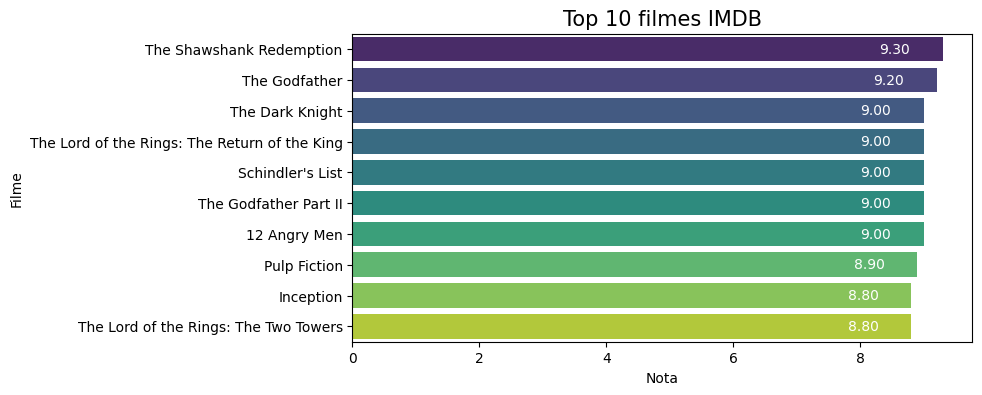

In [285]:
plt.figure(figsize=(8,4))
plt.title('Top 10 filmes IMDB', fontsize=15)
filmes = sns.barplot(x='Nota',y='Filme',data= movies.head(10),palette='viridis')

for p in filmes.patches:
    width = p.get_width()    #obter a largura da barra
    filmes.text(width + -1, #posicionei o texto em -1 para aparecer dentro da barra
            p.get_y() + p.get_height() / 2, # obtive a posição do Y + posição do X  / 2
            '{:1.2f}'.format(width), # Para aparecer duas casas decimais
            ha = 'left',   # Ordenar pela horizontal
            va = 'center',# Ordenar pela vertical
            color='white') #coloquei a cor branca por causa das cores do plot
plt.show()
